In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
#df = pd.read_csv("/content/group_merged_data.csv", low_memory= False)
import pandas as pd

df = pd.read_csv("/content/group_merged_data.csv", low_memory=False, encoding='latin-1')


In [5]:
df.head()

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,delayed
0,1996,12,15,7,1605.0,0,1804.0,0,AA,1481,...,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
1,1996,2,5,1,1242.0,1240,1533.0,1541,UA,286,...,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
2,1996,12,28,6,1335.0,1330,1606.0,1610,DL,1183,...,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
3,1996,12,10,2,857.0,0,1117.0,0,AA,1689,...,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N
4,1996,10,5,6,1420.0,1420,1459.0,1505,WN,1364,...,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N


In [8]:
print(df.columns)


Index(['year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime',
       'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum', 'tailnum',
       'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay',
       'delayed'],
      dtype='object')


In [9]:
df = df.drop(columns=['delayed'])


In [11]:
df.columns

Index(['year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime',
       'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum', 'tailnum',
       'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df.head()

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,1996,12,15,7,1605.0,0,1804.0,0,AA,1481,N878AA,119.0,114.0,80.0,5.0,0.0,ATL,MIA,595,23,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1996,2,5,1,1242.0,1240,1533.0,1541,UA,286,N906UA,111.0,121.0,96.0,-8.0,2.0,DEN,SAT,794,5,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1996,12,28,6,1335.0,1330,1606.0,1610,DL,1183,N943DL,91.0,100.0,75.0,-4.0,5.0,STL,ATL,483,8,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1996,12,10,2,857.0,0,1117.0,0,AA,1689,N5CXAA,260.0,262.0,242.0,-5.0,-3.0,ORD,SNA,1726,6,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1996,10,5,6,1420.0,1420,1459.0,1505,WN,1364,N610,99.0,105.0,85.0,-6.0,0.0,BWI,BNA,588,5,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isna().sum()

year                      0
month                     0
dayofmonth                0
dayofweek                 0
deptime                3167
crsdeptime                0
arrtime                3495
crsarrtime                0
uniquecarrier             0
flightnum                 0
tailnum                 284
actualelapsedtime      3495
crselapsedtime           23
airtime                3495
arrdelay               3495
depdelay               3167
origin                    0
dest                      0
distance                  0
taxiin                    0
taxiout                   0
cancelled                 0
cancellationcode     149124
diverted                  0
carrierdelay         102288
weatherdelay         102288
nasdelay             102288
securitydelay        102288
lateaircraftdelay    102288
dtype: int64

In [17]:
#df['uniqueCarrier'].unique()
df['uniquecarrier'].unique()


array(['AA', 'UA', 'DL', 'WN', 'US', 'CO', 'NW', 'TW', 'HP', 'AS', 'AQ',
       'MQ', 'DH', 'OO', 'EV', 'XE', 'FL', 'TZ', 'B6', 'HA', 'OH', '9E',
       'F9', 'YV'], dtype=object)

In [20]:
def is_delayed(row):
    if row['arrdelay'] > 0 or row['depdelay'] > 0:
        return 'Y'
    else:
        return 'N'

df['Delayed'] = df.apply(lambda row: is_delayed(row), axis=1)


In [21]:
df.head()

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,Delayed
0,1996,12,15,7,1605.0,0,1804.0,0,AA,1481,N878AA,119.0,114.0,80.0,5.0,0.0,ATL,MIA,595,23,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
1,1996,2,5,1,1242.0,1240,1533.0,1541,UA,286,N906UA,111.0,121.0,96.0,-8.0,2.0,DEN,SAT,794,5,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
2,1996,12,28,6,1335.0,1330,1606.0,1610,DL,1183,N943DL,91.0,100.0,75.0,-4.0,5.0,STL,ATL,483,8,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
3,1996,12,10,2,857.0,0,1117.0,0,AA,1689,N5CXAA,260.0,262.0,242.0,-5.0,-3.0,ORD,SNA,1726,6,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N
4,1996,10,5,6,1420.0,1420,1459.0,1505,WN,1364,N610,99.0,105.0,85.0,-6.0,0.0,BWI,BNA,588,5,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N


In [22]:
df['Delayed'].value_counts()

Delayed
Y    81096
N    68904
Name: count, dtype: int64

In [23]:
df.fillna(0, inplace=True)

In [24]:
df.head()

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,Delayed
0,1996,12,15,7,1605.0,0,1804.0,0,AA,1481,N878AA,119.0,114.0,80.0,5.0,0.0,ATL,MIA,595,23,16,0,0,0,0.0,0.0,0.0,0.0,0.0,Y
1,1996,2,5,1,1242.0,1240,1533.0,1541,UA,286,N906UA,111.0,121.0,96.0,-8.0,2.0,DEN,SAT,794,5,10,0,0,0,0.0,0.0,0.0,0.0,0.0,Y
2,1996,12,28,6,1335.0,1330,1606.0,1610,DL,1183,N943DL,91.0,100.0,75.0,-4.0,5.0,STL,ATL,483,8,8,0,0,0,0.0,0.0,0.0,0.0,0.0,Y
3,1996,12,10,2,857.0,0,1117.0,0,AA,1689,N5CXAA,260.0,262.0,242.0,-5.0,-3.0,ORD,SNA,1726,6,12,0,0,0,0.0,0.0,0.0,0.0,0.0,N
4,1996,10,5,6,1420.0,1420,1459.0,1505,WN,1364,N610,99.0,105.0,85.0,-6.0,0.0,BWI,BNA,588,5,9,0,0,0,0.0,0.0,0.0,0.0,0.0,N


In [25]:
airport_encoder = LabelEncoder()

In [26]:
target_encoder = LabelEncoder()

In [27]:
df['Delayed'] = target_encoder.fit_transform(df['Delayed'])

In [29]:
all_airports = np.array(list((set(df['origin'].unique()).union(set(df['dest'].unique())))))


In [30]:
all_airports

array(['SRQ', 'SJT', 'SLE', 'SLC', 'OME', 'PSP', 'SJC', 'ELM', 'SMX',
       'SYR', 'GNV', 'ILM', 'ACT', 'PDX', 'TUP', 'ILE', 'RST', 'OGD',
       'TYR', 'IYK', 'CSG', 'VLD', 'MSP', 'SUN', 'BRW', 'TPA', 'FAI',
       'SIT', 'BUF', 'AZO', 'GFK', 'PMD', 'MFE', 'CID', 'FCA', 'WYS',
       'CHO', 'PHF', 'ROC', 'MFR', 'ORD', 'HTS', 'LGA', 'MLU', 'BPT',
       'DAL', 'HRL', 'BGR', 'CDV', 'HPN', 'ABE', 'BDL', 'GUC', 'COD',
       'ABQ', 'SBN', 'CMI', 'EKO', 'MOB', 'MEM', 'MGM', 'ALO', 'ISP',
       'SCC', 'APF', 'PHX', 'STL', 'MOT', 'LYH', 'DFW', 'MOD', 'GSO',
       'LWB', 'RSW', 'RDM', 'FNT', 'DAB', 'HHH', 'MSO', 'BOI', 'LFT',
       'KOA', 'COS', 'HOU', 'ROW', 'OXR', 'MSN', 'RNO', 'AVP', 'MLI',
       'SGU', 'GRK', 'BUR', 'BTV', 'BZN', 'BJI', 'JAX', 'MLB', 'CMH',
       'AMA', 'GRR', 'ROA', 'HSV', 'MCI', 'HLN', 'ORH', 'JNU', 'BET',
       'ELP', 'TEX', 'LIT', 'DAY', 'FSM', 'MYR', 'WRG', 'LNK', 'SEA',
       'BTM', 'HNL', 'BTR', 'LBB', 'IAD', 'TRI', 'SGF', 'CRW', 'LAW',
       'ANC', 'MKE',

In [31]:
airport_encoder.fit(all_airports)

LabelEncoder()

In [33]:
df['origin'] = airport_encoder.transform(df['origin'])


In [34]:
df.head()

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,Delayed
0,1996,12,15,7,1605.0,0,1804.0,0,AA,1481,N878AA,119.0,114.0,80.0,5.0,0.0,19,MIA,595,23,16,0,0,0,0.0,0.0,0.0,0.0,0.0,1
1,1996,2,5,1,1242.0,1240,1533.0,1541,UA,286,N906UA,111.0,121.0,96.0,-8.0,2.0,81,SAT,794,5,10,0,0,0,0.0,0.0,0.0,0.0,0.0,1
2,1996,12,28,6,1335.0,1330,1606.0,1610,DL,1183,N943DL,91.0,100.0,75.0,-4.0,5.0,279,ATL,483,8,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1
3,1996,12,10,2,857.0,0,1117.0,0,AA,1689,N5CXAA,260.0,262.0,242.0,-5.0,-3.0,215,SNA,1726,6,12,0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,1996,10,5,6,1420.0,1420,1459.0,1505,WN,1364,N610,99.0,105.0,85.0,-6.0,0.0,49,BNA,588,5,9,0,0,0,0.0,0.0,0.0,0.0,0.0,0


In [36]:
df['dest'] = airport_encoder.transform(df['dest'])


In [37]:
df.head()

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,Delayed
0,1996,12,15,7,1605.0,0,1804.0,0,AA,1481,N878AA,119.0,114.0,80.0,5.0,0.0,19,191,595,23,16,0,0,0,0.0,0.0,0.0,0.0,0.0,1
1,1996,2,5,1,1242.0,1240,1533.0,1541,UA,286,N906UA,111.0,121.0,96.0,-8.0,2.0,81,253,794,5,10,0,0,0,0.0,0.0,0.0,0.0,0.0,1
2,1996,12,28,6,1335.0,1330,1606.0,1610,DL,1183,N943DL,91.0,100.0,75.0,-4.0,5.0,279,19,483,8,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1
3,1996,12,10,2,857.0,0,1117.0,0,AA,1689,N5CXAA,260.0,262.0,242.0,-5.0,-3.0,215,274,1726,6,12,0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,1996,10,5,6,1420.0,1420,1459.0,1505,WN,1364,N610,99.0,105.0,85.0,-6.0,0.0,49,36,588,5,9,0,0,0,0.0,0.0,0.0,0.0,0.0,0


In [39]:
encoded_carriers = pd.get_dummies(df['uniquecarrier'])

In [40]:
df = pd.concat([df, encoded_carriers], axis=1)

In [41]:
df.head()

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,Delayed,9E,AA,AQ,AS,B6,CO,DH,DL,EV,F9,FL,HA,HP,MQ,NW,OH,OO,TW,TZ,UA,US,WN,XE,YV
0,1996,12,15,7,1605.0,0,1804.0,0,AA,1481,N878AA,119.0,114.0,80.0,5.0,0.0,19,191,595,23,16,0,0,0,0.0,0.0,0.0,0.0,0.0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1996,2,5,1,1242.0,1240,1533.0,1541,UA,286,N906UA,111.0,121.0,96.0,-8.0,2.0,81,253,794,5,10,0,0,0,0.0,0.0,0.0,0.0,0.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,1996,12,28,6,1335.0,1330,1606.0,1610,DL,1183,N943DL,91.0,100.0,75.0,-4.0,5.0,279,19,483,8,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1996,12,10,2,857.0,0,1117.0,0,AA,1689,N5CXAA,260.0,262.0,242.0,-5.0,-3.0,215,274,1726,6,12,0,0,0,0.0,0.0,0.0,0.0,0.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1996,10,5,6,1420.0,1420,1459.0,1505,WN,1364,N610,99.0,105.0,85.0,-6.0,0.0,49,36,588,5,9,0,0,0,0.0,0.0,0.0,0.0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [44]:
df = df.drop(columns=['arrdelay', 'depdelay', 'uniquecarrier', 'tailnum', 'cancellationcode'])

In [45]:
X = df.drop(columns=['Delayed'])
y = df['Delayed']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
df.dtypes

year                   int64
month                  int64
dayofmonth             int64
dayofweek              int64
deptime              float64
crsdeptime             int64
arrtime              float64
crsarrtime             int64
flightnum              int64
actualelapsedtime    float64
crselapsedtime       float64
airtime              float64
origin                 int64
dest                   int64
distance               int64
taxiin                 int64
taxiout                int64
cancelled              int64
diverted               int64
carrierdelay         float64
weatherdelay         float64
nasdelay             float64
securitydelay        float64
lateaircraftdelay    float64
Delayed                int64
9E                      bool
AA                      bool
AQ                      bool
AS                      bool
B6                      bool
CO                      bool
DH                      bool
DL                      bool
EV                      bool
F9            

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree Accuracy: 0.7012666666666667
Decision Tree Precision: 0.7014183770156524
Decision Tree Recall: 0.7012666666666667
Decision Tree F1 Score: 0.7013362072955258
Decision Tree Confusion Matrix:


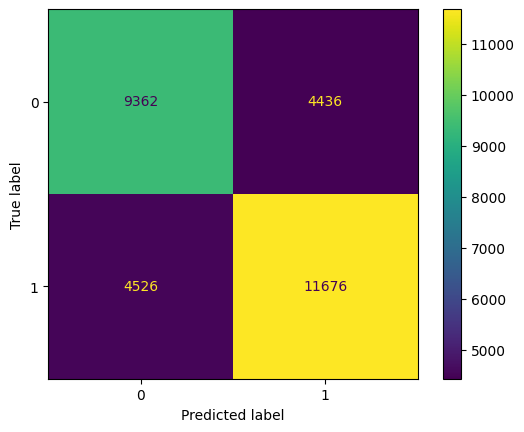

In [49]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_conf = confusion_matrix(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred, average='weighted')
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)
print("Decision Tree Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(dt_model, X_test_scaled, y_test)
plt.show()

Gaussian Naive Bayes Accuracy: 0.5306
Gaussian Naive Bayes Precision: 0.7588150014069365
Gaussian Naive Bayes Recall 0.5306
Gaussian Naive Bayes F1 Score: 0.43086866330947504


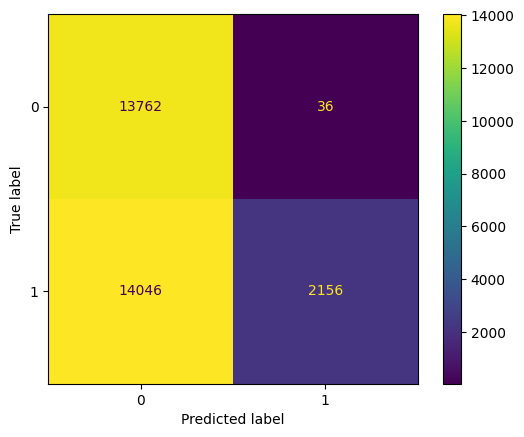

In [50]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_pred = nb_classifier.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted', zero_division=0.0)
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_conf = confusion_matrix(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
print("Gaussian Naive Bayes Accuracy:", nb_accuracy)
print("Gaussian Naive Bayes Precision:", nb_precision)
print("Gaussian Naive Bayes Recall", nb_recall)
print("Gaussian Naive Bayes F1 Score:", nb_f1)
ConfusionMatrixDisplay.from_estimator(nb_classifier, X_test_scaled, y_test)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7326
Logistic Regression Precision: 0.733241607427117
Logistic Regression Recall 0.7326
Logistic Regression F1 Score: 0.7328176343955732


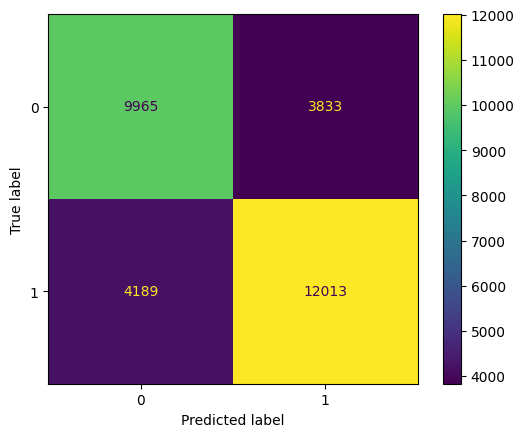

In [51]:
logreg_classifier = LogisticRegression(max_iter=200)
logreg_classifier.fit(X_train_scaled, y_train)
logreg_pred = logreg_classifier.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred, average='weighted', zero_division=0.0)
logreg_recall = recall_score(y_test, logreg_pred, average='weighted')
logreg_conf = confusion_matrix(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred, average='weighted')
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Precision:", logreg_precision)
print("Logistic Regression Recall", logreg_recall)
print("Logistic Regression F1 Score:", logreg_f1)
ConfusionMatrixDisplay.from_estimator(logreg_classifier, X_test_scaled, y_test)
plt.show()

Stochastic Gradient Descent Classifier Accuracy: 0.7555
Stochastic Gradient Descent Classifier Precision: 0.7578324871328621
Stochastic Gradient Descent Classifier Recall 0.7555
Stochastic Gradient Descent Classifier F1 Score: 0.7558786228746545


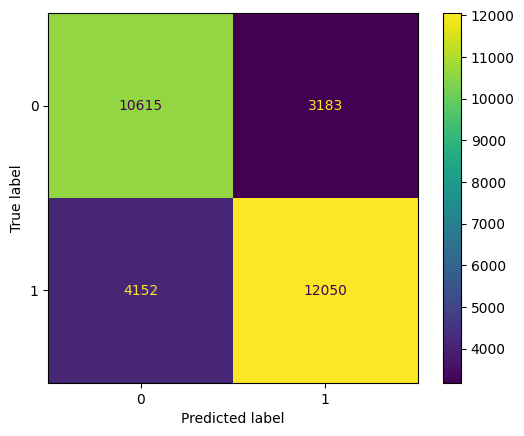

In [52]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train_scaled, y_train)
sgd_pred = sgd_classifier.predict(X_test_scaled)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
sgd_precision = precision_score(y_test, sgd_pred, average='weighted', zero_division=1.0)
sgd_recall = recall_score(y_test, sgd_pred, average='weighted')
sgd_f1 = f1_score(y_test, sgd_pred, average='weighted')
sgd_conf = confusion_matrix(y_test, sgd_pred)
print("Stochastic Gradient Descent Classifier Accuracy:", sgd_accuracy)
print("Stochastic Gradient Descent Classifier Precision:", sgd_precision)
print("Stochastic Gradient Descent Classifier Recall", sgd_recall)
print("Stochastic Gradient Descent Classifier F1 Score:", sgd_f1)
ConfusionMatrixDisplay.from_estimator(sgd_classifier, X_test_scaled, y_test)
plt.show()

Random Forest Accuracy: 0.7614333333333333
Random Forest Precision: 0.7616864403769609
Random Forest Recall 0.7614333333333333
Random Forest F1 Score: 0.761535113910078


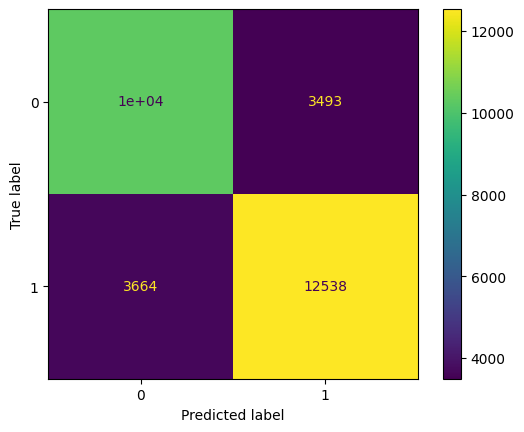

In [53]:
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=16, n_estimators=200)
rf_classifier.fit(X_train_scaled, y_train)
rf_pred = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted', zero_division=0.0)
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_conf = confusion_matrix(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall", rf_recall)
print("Random Forest F1 Score:", rf_f1)
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test_scaled, y_test)
plt.show()

## Deep Learning

In [54]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [55]:
neural_network = Sequential([
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [56]:
neural_network.compile(
    optimizer='nadam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [57]:
neural_network.fit(X_train_scaled, y_train, epochs=300, batch_size=1024)

Epoch 1/300
118/118 [==============================] - 2s 7ms/step - loss: 0.5815 - accuracy: 0.6736
Epoch 2/300
118/118 [==============================] - 1s 6ms/step - loss: 0.5290 - accuracy: 0.7194
Epoch 3/300
118/118 [==============================] - 1s 7ms/step - loss: 0.5087 - accuracy: 0.7355
Epoch 4/300
118/118 [==============================] - 1s 7ms/step - loss: 0.4935 - accuracy: 0.7484
Epoch 5/300
118/118 [==============================] - 1s 11ms/step - loss: 0.4798 - accuracy: 0.7591
Epoch 6/300
118/118 [==============================] - 1s 11ms/step - loss: 0.4650 - accuracy: 0.7700
Epoch 7/300
118/118 [==============================] - 1s 11ms/step - loss: 0.4481 - accuracy: 0.7826
Epoch 8/300
118/118 [==============================] - 1s 9ms/step - loss: 0.4276 - accuracy: 0.7957
Epoch 9/300
118/118 [==============================] - 1s 7ms/step - loss: 0.4049 - accuracy: 0.8094
Epoch 10/300
118/118 [==============================] - 1s 7ms/step - loss: 0.3815 - acc

In [58]:
nn_pred = neural_network.predict(X_test_scaled)
nn_pred = (nn_pred > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred, average='weighted', zero_division=1.0)
nn_recall = recall_score(y_test, nn_pred, average='weighted')
nn_f1 = f1_score(y_test, nn_pred, average='weighted')
sgd_conf = confusion_matrix(y_test, nn_pred)
print("Neural Network Accuracy:", nn_accuracy)
print("Neural Network Precision:", nn_precision)
print("Neural Network Recall", nn_recall)
print("Neural Network F1 Score:", nn_f1)

938/938 [==============================] - 2s 2ms/step
Neural Network Accuracy: 0.9526666666666667
Neural Network Precision: 0.9530984125578243
Neural Network Recall 0.9526666666666667
Neural Network F1 Score: 0.9527093511904762


In [59]:
import pickle

with open('neural_network.pkl', 'wb') as f:
    pickle.dump(neural_network, f)

In [60]:
from imblearn.over_sampling import SMOTE
# Synthetic Oversampling to handle imbalanced classes
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
X_train_res.shape

(103830, 48)

In [61]:
y_train_res.value_counts()

Delayed
1    51923
0    51907
Name: count, dtype: int64

Decision Tree Accuracy (res): 0.7154249171738963
Decision Tree Precision (res): 0.7154254076307809
Decision Tree Recall (res): 0.7154249171738963
Decision Tree F1 Score (res): 0.7154249235088824
Decision Tree Confusion Matrix (res):


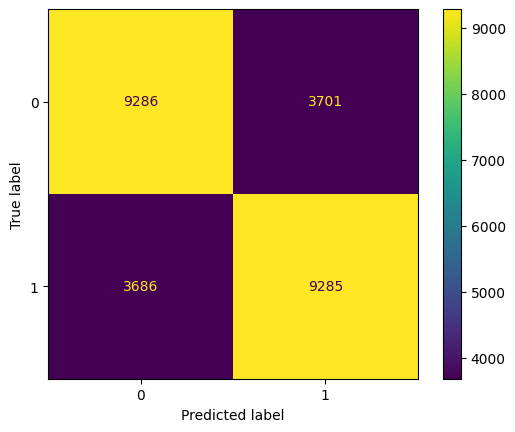

In [62]:
dt_model_res = DecisionTreeClassifier(random_state=42)
dt_model_res.fit(X_train_res, y_train_res)
dt_pred_res = dt_model_res.predict(X_val_res)
dt_accuracy_res = accuracy_score(y_val_res, dt_pred_res)
dt_precision_res = precision_score(y_val_res, dt_pred_res, average='weighted', zero_division=0.0)
dt_recall_res = recall_score(y_val_res, dt_pred_res, average='weighted')
dt_conf_res = confusion_matrix(y_val_res, dt_pred_res)
dt_f1_res = f1_score(y_val_res, dt_pred_res, average='weighted')
print("Decision Tree Accuracy (res):", dt_accuracy_res)
print("Decision Tree Precision (res):", dt_precision_res)
print("Decision Tree Recall (res):", dt_recall_res)
print("Decision Tree F1 Score (res):", dt_f1_res)
print("Decision Tree Confusion Matrix (res):")
ConfusionMatrixDisplay.from_estimator(dt_model_res, X_val_res, y_val_res)
plt.show()

Gaussian Naive Bayes Accuracy (res): 0.5662608829647893
Gaussian Naive Bayes Precision (res): 0.7560507967923651
Gaussian Naive Bayes Recall (res): 0.5662608829647893
Gaussian Naive Bayes F1 Score (res): 0.46738152995715637
Gaussian Naive Bayes Confusion Matrix (res):


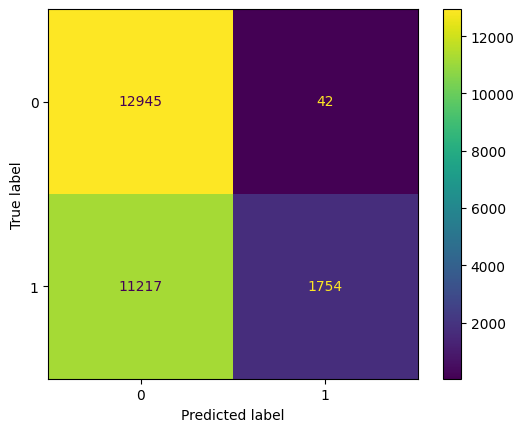

In [63]:
nb_classifier_res = GaussianNB()
nb_classifier_res.fit(X_train_res, y_train_res)
nb_pred_res = nb_classifier_res.predict(X_val_res)
nb_accuracy_res = accuracy_score(y_val_res, nb_pred_res)
nb_precision_res = precision_score(y_val_res, nb_pred_res, average='weighted', zero_division=0.0)
nb_recall_res = recall_score(y_val_res, nb_pred_res, average='weighted')
nb_conf_res = confusion_matrix(y_val_res, nb_pred_res)
nb_f1_res = f1_score(y_val_res, nb_pred_res, average='weighted')
print("Gaussian Naive Bayes Accuracy (res):", nb_accuracy_res)
print("Gaussian Naive Bayes Precision (res):", nb_precision_res)
print("Gaussian Naive Bayes Recall (res):", nb_recall_res)
print("Gaussian Naive Bayes F1 Score (res):", nb_f1_res)
print("Gaussian Naive Bayes Confusion Matrix (res):")
ConfusionMatrixDisplay.from_estimator(nb_classifier_res, X_val_res, y_val_res)
plt.show()
